# SF-DAT-21 | Unit Project 2

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

### Step 1: Load the python libraries you will need for this project

In [65]:
# imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import math

%matplotlib inline

### Step 2: Read in your data set

In [5]:
# read in data from source
df_raw = pd.read_csv("../../dataset/admissions.csv")
print df_raw.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset?


In [7]:
print len(df_raw)

df_raw.count()

400


admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 400 observations.

#### Question 2. Create a summary table.

In [8]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The GRE has a bigger range, out of 800 while GPA is a number out of 4. Therefore one point difference in GPA is much more significant than one point of difference in GRE score

#### Question 4. Drop data points with missing data.


In [9]:
df_tidy = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data.  How can you tell?

In [11]:
print df_tidy.isnull().sum().sum()

df_tidy.isnull().sum()

0


admit       0
gre         0
gpa         0
prestige    0
dtype: int64

Answer: When running isnull().sum().sum() you get 0 that means that there is no missing data in the dataframe

#### Question 6. Create box plots for GRE and GPA.

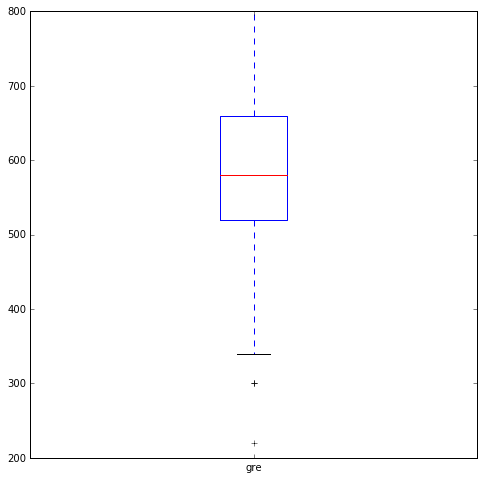

In [12]:
# boxplot 1
df_tidy['gre'].plot(kind = 'box', figsize = (8,8))

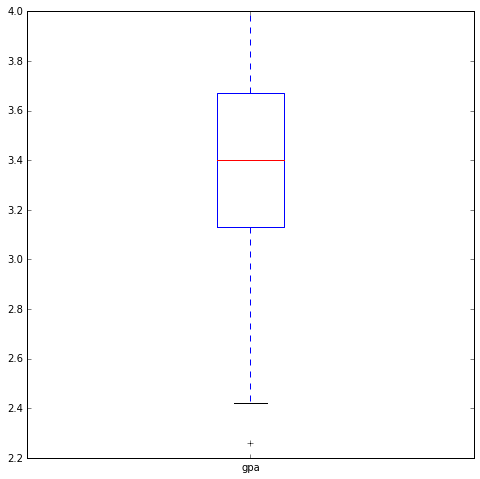

In [13]:
# boxplot 2

df_tidy['gpa'].plot(kind = 'box', figsize = (8,8))

#### Question 7. What do this plots show?

Answer: GPA has one outlier and seems to be skewed to the right. GRE has two outliers but is otherwise rather symmetric.

#### Question 8. Describe each distribution.

Axes(0.125,0.125;0.775x0.775)


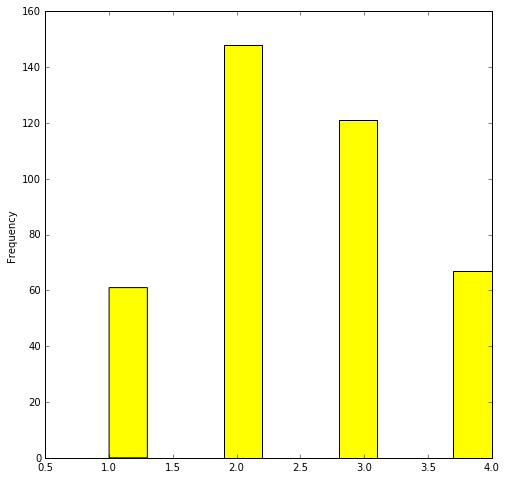

In [24]:
print df_tidy['prestige'].plot(kind = 'hist', figsize = (8,8), color = 'yellow')

Axes(0.125,0.125;0.775x0.775)


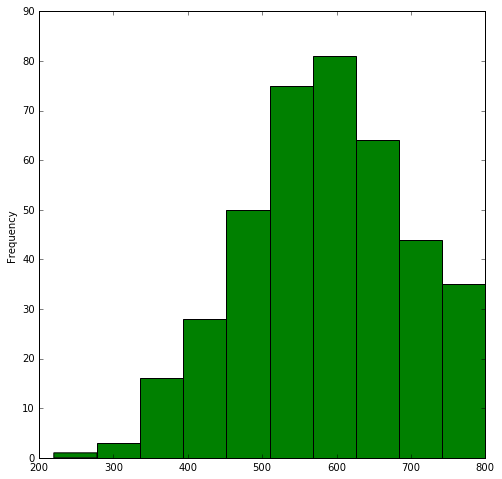

In [22]:
print df_tidy['gre'].plot(kind = 'hist', figsize = (8,8), color = 'green')


Axes(0.125,0.125;0.775x0.775)


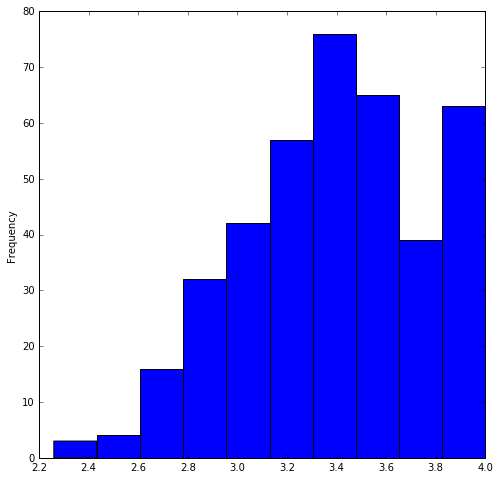

In [12]:
print df_tidy['gpa'].plot(kind = 'hist', figsize = (8,8))


#### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

Answer: No, not all the distributions are symmetric and bell shaped.

#### Question 10. Does this distribution need correction?  If so, why?  How?

Answer: Yes, becuase all values have a set range they must be corrected in order to achieve a bell curve.

#### Question 11. Which of our variables are potentially colinear?

In [14]:
# create a correlation matrix for the data
df_tidy.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


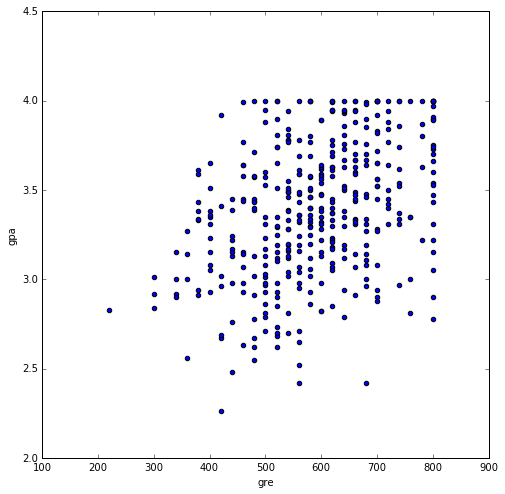

In [25]:
df_tidy.plot(kind = 'scatter', x = 'gre', y = 'gpa', figsize = (8,8))

#### Question 12. What did you find?

Answer: GRE scores and gpa are positively correlated with a coefficient of .382.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

Answer: I would group by each level of prestige and plot the correlation between prestige and admittance. I would check the data to see the caliber of candidates that are applying to the UCLA grad school. It could be that because UCLA is not the best grad school, the top students from the most prestigious institutions are not accounted for in this data. I would acquire data for some of the most prestigious grad schools and see if there is still negative correlation between prestige and admitted.

The negative correlation could also be due to the small size of the sample, especially the small number of observations from the 3 or 4 prestige level.

#### Question 14. What is your hypothesis?

Answer: If data is acquired from top graduate school programs, there will be a possitive correlation between grad school admissions rates and prestige of undergraduate schools.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data.

Answer: You could use the mean and standard deviation to impute the missing data.

#### 2. Bonus: Log transform the skewed data.

In [93]:
df_raw['gpa log'] = df_raw.gpa.apply(lambda x: 1+math.log(x))
df_raw['gre log'] = df_raw.gre.apply(lambda x: 1+math.log(x))


In [94]:
df_raw.head()

,admit,gre,gpa,prestige,gre log,gpa log
0,0,380,3.61,3,6.940171,2.283708
1,1,660,3.67,3,7.492240,2.300192
2,1,800,4.00,1,7.684612,2.386294
3,1,640,3.19,4,7.461468,2.160021
4,0,520,2.93,4,7.253829,2.075002


#### 3. Advanced: Impute missing data.

In [58]:
#Identify the missing data
print df_raw[df_raw.gre.isnull()]
print df_raw[df_raw.gpa.isnull()]
print df_raw[df_raw.prestige.isnull()]

    #Index numbers are 187, 212, 236 all have missing values

Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []
Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []
Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []


In [40]:
# Get the Mean and STD of ALL Data

print 'Mean GRE: {:3.3f}, Std GRE: {:3.3f}'.\
        format(df_raw.gre.mean(),df_raw.gre.std())
print 'Mean GPA: {:3.3f}, Std GPA: {:3.3f}'.\
        format(df_raw.gpa.mean(),df_raw.gpa.std())
print 'Mean Prestige: {:3.3f}, Std Prestige: {:3.3f}'.\
        format(df_raw.prestige.mean(),df_raw.prestige.std())

Mean GRE: 588.040, Std GRE: 115.629
Mean GPA: 3.391, Std GPA: 0.381
Mean Prestige: 2.486, Std Prestige: 0.945


In [41]:
# Create a Normal Distribution centered on Mean and Standard Dev 
def get_gre_impute_values(n):
    return np.random.normal(588.040, 115.629, n)

def get_gpa_impute_values(n):
    return np.random.normal(3.391, 0.381, n)

def get_prestige_impute_values(n):
    return np.random.normal(2.486, 0.945, n)

In [55]:
#Create a mas for missing values

gre_missing_mask = df_raw.gre.isnull()
gpa_missing_mask = df_raw.gpa.isnull()
prestige_missing_mask = df_raw.prestige.isnull()

df_raw[prestige_missing_mask]

,admit,gre,gpa,prestige
236,1,660,NaN,NaN


In [57]:
#Get values for gre

df_raw.loc[df_raw.gre.isnull(), 'gre'] = get_gre_impute_values(n=2)
df_raw.loc[df_raw.gpa.isnull(), 'gpa'] = get_gpa_impute_values(n=2)
df_raw.loc[df_raw.prestige.isnull(), 'prestige'] = get_prestige_impute_values(n=1)

In [64]:
df_raw[236:237:]

,admit,gre,gpa,prestige
236,1,660,3.383113,0.587255


In [85]:
df_raw['gpa log'] = df_raw.gpa.apply(lambda x: math.log(x))


In [86]:
df_raw.head()

,admit,gre,gpa,prestige,gre log,gpa log
0,0,380,3.61,3,5.940171,1.283708
1,1,660,3.67,3,6.492240,1.300192
2,1,800,4.00,1,6.684612,1.386294
3,1,640,3.19,4,6.461468,1.160021
4,0,520,2.93,4,6.253829,1.075002


Axes(0.125,0.125;0.775x0.775)


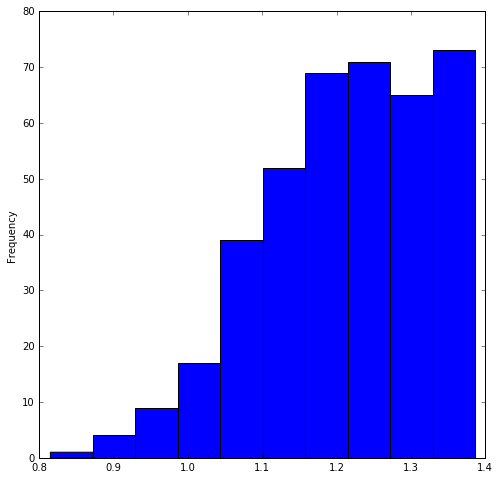

In [87]:
print df_raw['gpa log'].plot(kind = 'hist', figsize = (8,8))


Axes(0.125,0.125;0.775x0.775)


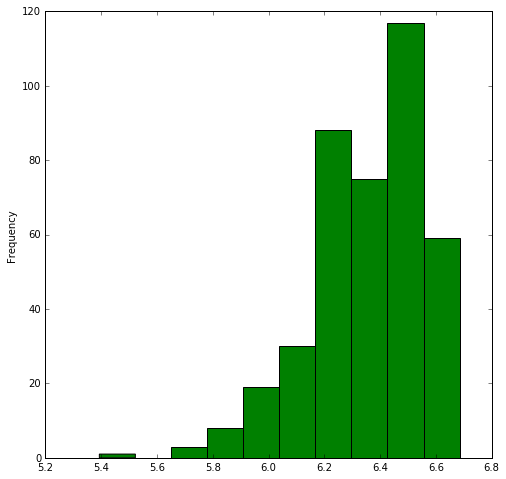

In [88]:
print df_raw['gre log'].plot(kind = 'hist', figsize = (8,8), color = 'green')
